In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\official\processed_data_ready_to_analyze.csv")

In [54]:

# Full row duplicates
df.duplicated().sum()

# # Drop duplicates
# df = df.drop_duplicates()
# df

np.int64(0)

In [55]:
df.sample(2) #View data sample

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Number_of_Defaults,Last_Default_Date,Default_Amount,Bankruptcy_History,Bankruptcy_Flag,Adjusted_Credit_Score,Moodys_Rating,Payment_History_Flag,Payment_Risk,estimated_annual_revenue
2179,716745408,Existing Customer,54,M,1,High School,Single,$80K - $120K,Blue,36,...,0,NaN,0.0,No,0,801.0,Aaa,good,good,449.6
6162,709583133,Existing Customer,53,M,3,Uneducated,Married,$40K - $60K,Blue,40,...,0,NaN,0.0,No,0,795.0,Aa,good,good,338.4


In [56]:
df.shape  #Rows & columns

(10128, 40)

In [57]:
# df.info()

In [58]:
# Explanation:
# NB stands for Naive Bayes.
# Attrition_Prob_Yes = probability of the customer leaving (class 1).
# Attrition_Prob_No = probability of the customer staying (class 2 or 0).

df.rename(columns={
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB_Attrition_Prob_Yes",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB_Attrition_Prob_No"
}, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128 entries, 0 to 10127
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10128 non-null  object 
 1   Attrition_Flag            10128 non-null  object 
 2   Customer_Age              10128 non-null  int64  
 3   Gender                    10128 non-null  object 
 4   Dependent_count           10128 non-null  int64  
 5   Education_Level           10128 non-null  object 
 6   Marital_Status            10128 non-null  object 
 7   Income_Category           10128 non-null  object 
 8   Card_Category             10128 non-null  object 
 9   Months_on_book            10128 non-null  int64  
 10  Total_Relationship_Count  10128 non-null  int64  
 11  Months_Inactive_12_mon    10128 non-null  int64  
 12  Contacts_Count_12_mon     10128 non-null  int64  
 13  Credit_Limit              10128 non-null  float64
 14  Total_

In [60]:
# Percentage of missing values
df.isnull().sum().sort_values(ascending=False)

Last_Default_Date           7873
DTI_ratio                   1112
monthly_income              1112
annual_income               1112
Avg_Utilization_Ratio          1
NB_Attrition_Prob_Yes          1
NB_Attrition_Prob_No           1
Total_Ct_Chng_Q4_Q1            1
Total_Trans_Amt                1
Total_Trans_Ct                 1
Total_Amt_Chng_Q4_Q1           1
Dependent_count                0
Gender                         0
Customer_Age                   0
Attrition_Flag                 0
CLIENTNUM                      0
Income_Category                0
Marital_Status                 0
Education_Level                0
Contacts_Count_12_mon          0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Card_Category                  0
Attrition_Type                 0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
DTI_Risk_Level                 0
Credit_Score                   0
Loan_Defau

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10128.0,46.326521,8.016616,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10128.0,2.346465,1.299112,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10128.0,35.928910,7.986181,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10128.0,3.812599,1.554332,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10128.0,2.342121,1.015120,0.000000,2.000000,2.000000,3.000000,12.000000
Contacts_Count_12_mon,10128.0,2.455075,1.106440,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10128.0,8634.557178,9092.103865,1438.300000,2555.000000,4549.000000,11070.250000,35000.000000
Total_Revolving_Bal,10128.0,1162.947769,815.058178,0.000000,360.000000,1276.500000,1784.000000,2517.000000
Avg_Open_To_Buy,10128.0,7471.577814,9093.547561,3.000000,1324.750000,3474.500000,9861.750000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


In [62]:
# Check for duplicate column names
df.columns.duplicated().any()


np.False_

In [63]:
# Ensure correct data types
df.dtypes

CLIENTNUM                    object
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
NB_Attrition_Prob_Yes       float64
NB_Attrition_Prob_No        float64
Attrition_Type               object
annual_income               float64
monthly_income              float64
DTI_ratio                   float64
DTI_Risk_Level              

In [3]:
# Convert as needed
df['Last_Default_Date'] = pd.to_datetime(df['Last_Default_Date'])
df['Income_Category'] = df['Income_Category'].astype('category')

categorical_cols = ['Attrition_Type', 'Income_Category', 'Attrition_Flag',
                    'Education_Level', 'Marital_Status','Card_Category',
                    'Bankruptcy_Flag','Moodys_Rating','Payment_History_Flag',
                    'Payment_Risk']
df[categorical_cols] = df[categorical_cols].astype('category')
df[categorical_cols].describe()


,Attrition_Type,Income_Category,Attrition_Flag,Education_Level,Marital_Status,Card_Category,Bankruptcy_Flag,Moodys_Rating,Payment_History_Flag,Payment_Risk
count,10128,10128,10128,10128,10128,10128,10128,10128,10128,10128
unique,3,6,2,8,4,4,2,9,2,2
top,Existing Customer,Less than $40K,Existing Customer,Graduate,Married,Blue,0,Ca,good,good
freq,8500,3561,8500,3128,4687,9436,9112,1539,8867,8867


In [4]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='category').columns

# Display unique values
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Attrition_Flag':
['Attrited Customer', 'Existing Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']

Unique values in 'Education_Level':
['Undergraduate', 'Graduate', 'Unknown', 'Doctorate', 'Uneducated', 'High School', 'Post-Graduate', 'College']
Categories (8, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Undergraduate', 'Uneducated', 'Unknown']

Unique values in 'Marital_Status':
['Single', 'Divorced', 'Married', 'Unknown']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']

Unique values in 'Income_Category':
['$60K - $80K', '$80K - $120K', '$120K +', 'Unknown', '$40K - $60K', 'Less than $40K']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']

Unique values in 'Card_Category':
['Gold', 'Blue', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

Unique values in 'Attrition_Type':
['Involuntary

In [5]:
# To set all 'Unknown' values in your categorical columns to NaN (null),

In [6]:
import numpy as np

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include='category').columns

# Step 2: Replace 'Unknown' with np.nan in those columns
df[categorical_cols] = df[categorical_cols].replace('Unknown', np.nan)


# Identify categorical columns
cat_cols = df.select_dtypes(include='category').columns

# Display unique values
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Attrition_Flag':
['Attrited Customer', 'Existing Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']

Unique values in 'Education_Level':
['Undergraduate', 'Graduate', NaN, 'Doctorate', 'Uneducated', 'High School', 'Post-Graduate', 'College']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Undergraduate', 'Uneducated']

Unique values in 'Marital_Status':
['Single', 'Divorced', 'Married', NaN]
Categories (3, object): ['Divorced', 'Married', 'Single']

Unique values in 'Income_Category':
['$60K - $80K', '$80K - $120K', '$120K +', NaN, '$40K - $60K', 'Less than $40K']
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K']

Unique values in 'Card_Category':
['Gold', 'Blue', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

Unique values in 'Attrition_Type':
['Involuntary', 'Existing Customer', 'Voluntary']
Categories (3,

C:\Users\User\AppData\Local\Temp\ipykernel_24360\3597226862.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[categorical_cols] = df[categorical_cols].replace('Unknown', np.nan)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128 entries, 0 to 10127
Data columns (total 40 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                                              --------------  -----         
 0   CLIENTNUM                                                                                                                           10128 non-null  object        
 1   Attrition_Flag                                                                                                                      10128 non-null  category      
 2   Customer_Age                                                                                                                        10128 non-null  int64         
 3   Gender                                        

In [8]:
# Percentage of missing values
df.isnull().sum().sort_values(ascending=False)

Last_Default_Date                                                                                                                     7873
Education_Level                                                                                                                       1519
monthly_income                                                                                                                        1112
Income_Category                                                                                                                       1112
DTI_ratio                                                                                                                             1112
annual_income                                                                                                                         1112
Marital_Status                                                                                                                         749
Total_Ct_Chng_Q4_Q1        

In [70]:
# in order to deal with missing Income_Category, Let me deal do some research         

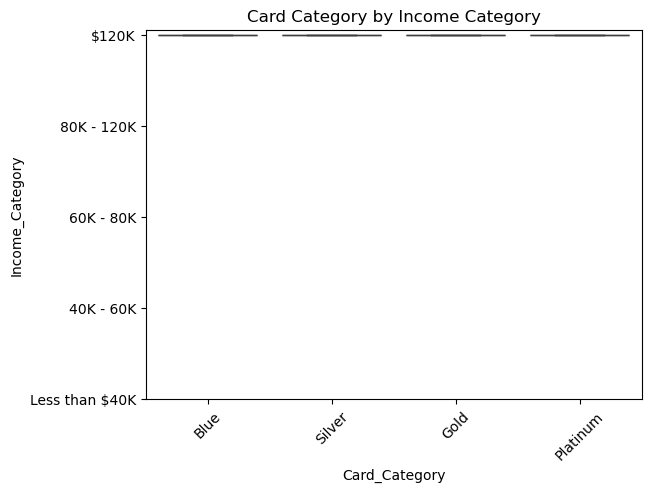

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom x-axis (Card_Category) order
category_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Define your custom y-axis (Income_Category) order
income_order = ['$120K','80K - 120K','60K - 80K',  '40K - 60K','Less than $40K',  ]

# Create boxplot with custom order for both axes
sns.boxplot(
    x='Card_Category',
    y='Income_Category',
    data=df,
    order=category_order,
    hue_order=None  # not using hue
)

# Set y-axis order manually (works for categorical y-axis)
plt.yticks(ticks=range(len(income_order)), labels=income_order)

plt.xticks(rotation=45)
plt.title("Card Category by Income Category")
plt.show()


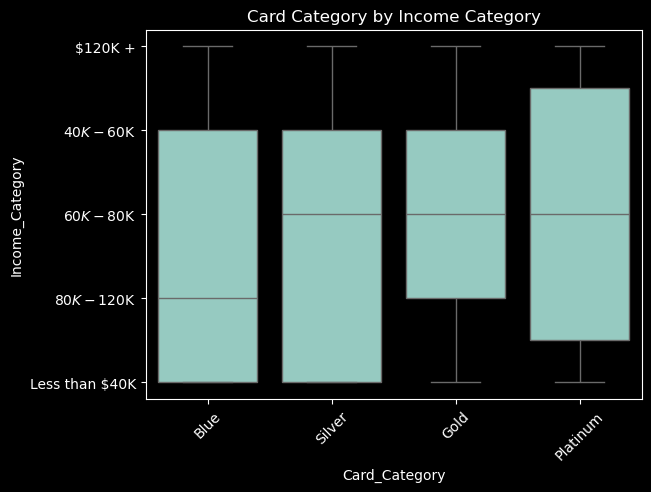

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom order
category_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Create boxplot with custom x-axis order
sns.boxplot(x='Card_Category', y='Income_Category', data=df, order=category_order)

plt.xticks(rotation=45)
plt.title("Card Category by Income Category")
plt.show()

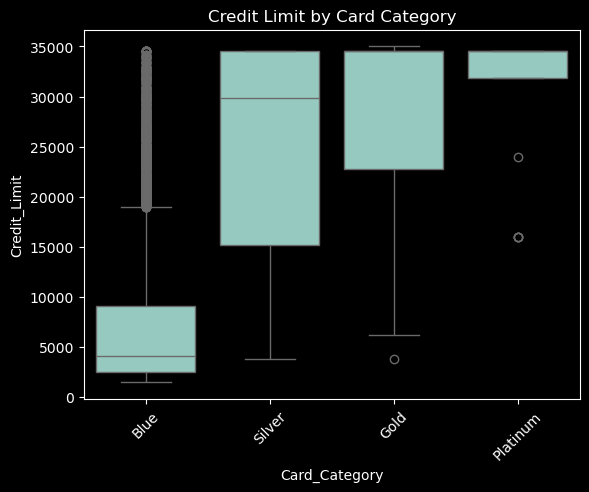

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom order
category_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Create boxplot with custom x-axis order
sns.boxplot(x='Card_Category', y='Credit_Limit', data=df, order=category_order)

plt.xticks(rotation=45)
plt.title("Credit Limit by Card Category")
plt.show()

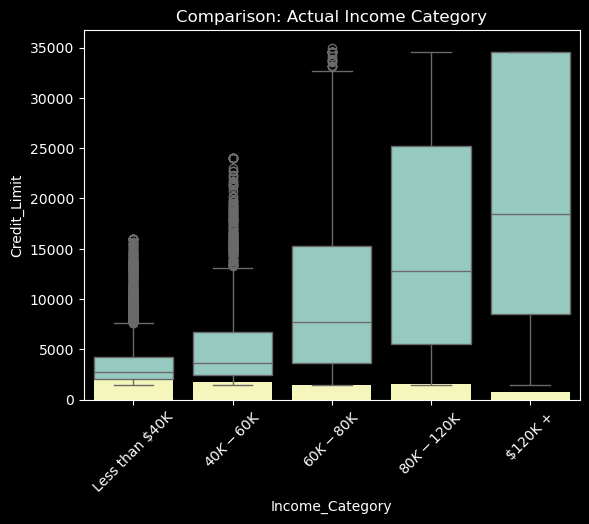

In [73]:
#  Income_Category and Credit_Limit for existing data:
# Define your custom order
category_order = [ 'Less than $40K',  '$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +', ]

# Create boxplot with custom x-axis order
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df, order=category_order)

sns.countplot(data=df[df['Income_Category'].notna()], x='Income_Category')
plt.xticks(rotation=45)
plt.title('Comparison: Actual Income Category')
plt.show()


In [74]:
# Get Average Credit_Limit by Income_Category

import pandas as pd

# Define the desired order
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Convert to ordered categorical type
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=income_order, ordered=True)

# Group by and calculate mean
avg_credit_by_income = df.groupby('Income_Category')['Credit_Limit'].mean().reset_index()

# Display result
print(avg_credit_by_income)


  Income_Category  Credit_Limit
0  Less than $40K   3754.404521
1     $40K - $60K   5462.259832
2     $60K - $80K  10776.051105
3    $80K - $120K  15809.890945
4         $120K +  19717.322558


C:\Users\User\AppData\Local\Temp\ipykernel_10260\2923876786.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_credit_by_income = df.groupby('Income_Category')['Credit_Limit'].mean().reset_index()


In [75]:
# Create Income Buckets Based on Credit Limit
def infer_income_category(row):
    if row['Credit_Limit'] >= 19000:
        return '>$120K'
    elif row['Credit_Limit'] >= 15000:
        return '$80K - $120K'
    elif row['Credit_Limit'] >= 10000:
        return '$60K - $80K'
    elif row['Credit_Limit'] >= 5462:
        return '$40K - $60K'
    # elif row['Credit_Limit'] > 3754:
    #     return 'Less than $40K'
    else:
        return 'Less than $40K'

    # elif row['Credit_Limit'] > 3754:
    #     return 'Less than $40K'
    # else:
    #     return np.nan

df['Income_Category_Inferred'] = df.apply(infer_income_category, axis=1)

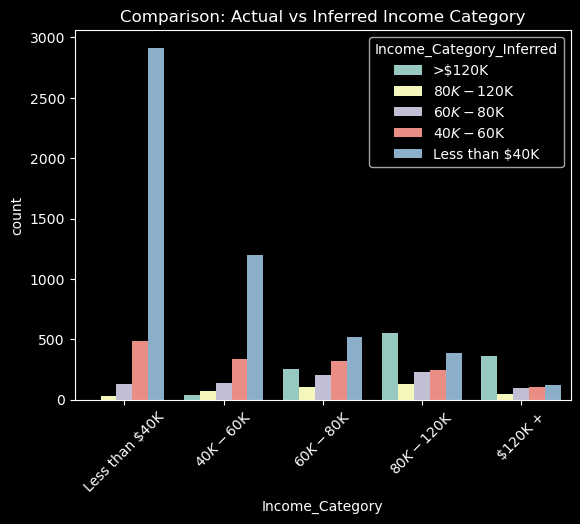

In [76]:
# If some rows still have true Income_Category, you can compare distributions:
sns.countplot(data=df[df['Income_Category'].notna()], x='Income_Category', hue='Income_Category_Inferred')
plt.xticks(rotation=45)
plt.title('Comparison: Actual vs Inferred Income Category')
plt.show()


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10128 entries, 0 to 10127
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CLIENTNUM                 10128 non-null  object        
 1   Attrition_Flag            10128 non-null  category      
 2   Customer_Age              10128 non-null  int64         
 3   Gender                    10128 non-null  object        
 4   Dependent_count           10128 non-null  int64         
 5   Education_Level           8609 non-null   category      
 6   Marital_Status            9379 non-null   category      
 7   Income_Category           9016 non-null   category      
 8   Card_Category             10128 non-null  category      
 9   Months_on_book            10128 non-null  int64         
 10  Total_Relationship_Count  10128 non-null  int64         
 11  Months_Inactive_12_mon    10128 non-null  int64         
 12  Contacts_Count_12_

In [78]:
# I want to income information for all the customers.
# Mothed: use neam for the that category for impute missing income values 
df['Income_Category_Inferred'] = df['Income_Category_Inferred'].astype('category')
df['Income_Category_Inferred'].unique()

['>$120K', '$80K - $120K', '$60K - $80K', '$40K - $60K', 'Less than $40K']
Categories (5, object): ['$40K - $60K', '$60K - $80K', '$80K - $120K', '>$120K', 'Less than $40K']

In [79]:
df['Income_Category'].unique()

['$60K - $80K', '$80K - $120K', '$120K +', NaN, '$40K - $60K', 'Less than $40K']
Categories (5, object): ['Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +']

In [80]:
# # Ensure all inferred categories are added first
# new_cats = df['Income_Category_Inferred'].unique()
# df['Income_Category'] = df['Income_Category'].cat.add_categories(new_cats)

# Now fill missing
df['Income_Category_Complete'] = df['Income_Category'].astype(str).replace('nan', pd.NA).fillna(
    df['Income_Category_Inferred'].astype(str).replace('nan', pd.NA)
)

df['Income_Category_Complete'] = df['Income_Category_Complete'].astype('category')

In [81]:
df.isnull().sum().sort_values(ascending=False)


Last_Default_Date           7873
Education_Level             1519
annual_income               1112
DTI_ratio                   1112
monthly_income              1112
Income_Category             1112
Marital_Status               749
Total_Amt_Chng_Q4_Q1           1
Total_Trans_Ct                 1
Total_Ct_Chng_Q4_Q1            1
NB_Attrition_Prob_No           1
NB_Attrition_Prob_Yes          1
Avg_Utilization_Ratio          1
Total_Trans_Amt                1
Customer_Age                   0
Attrition_Flag                 0
CLIENTNUM                      0
Dependent_count                0
Months_on_book                 0
Card_Category                  0
Gender                         0
Avg_Open_To_Buy                0
Months_Inactive_12_mon         0
Total_Relationship_Count       0
Total_Revolving_Bal            0
Credit_Limit                   0
Attrition_Type                 0
Contacts_Count_12_mon          0
Credit_Score                   0
DTI_Risk_Level                 0
Loan_Defau

In [82]:
# makeup the annual income and monthly income again
import numpy as np
import pandas as pd

# Define income ranges for each category
income_ranges = {
    'Less than $40K': (20000, 39999),
    '$40K - $60K': (40000, 59999),
    '$60K - $80K': (60000, 79999),
    '$80K - $120K': (80000, 119999),
    '$120K +': (120000, 200000),  # or any reasonable upper bound
}

# Apply function to assign random incomes
def assign_random_income(row):
    category = row['Income_Category_Complete']
    if category in income_ranges:
        low, high = income_ranges[category]
        return np.random.randint(low, high + 1)
    else:
        return np.nan  # keep NaN for 'Unknown' or others

df['annual_income'] = df.apply(assign_random_income, axis=1)
df['monthly_income'] = df['annual_income'] /12
df['DTI_ratio'] = df['Total_Revolving_Bal']/df['monthly_income']*100


# to get Risk_Level
def classify_dti_risk(dti):
    if dti < 36:
        return 'Low Risk'
    elif 36 <= dti <= 49:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['DTI_Risk_Level'] = df['DTI_ratio'].apply(classify_dti_risk)


In [83]:
# unique value check -- Checked earlier

In [84]:
# normality Check
# Great! To test normality for all numeric columns in your DataFrame, you can loop through them and 
# apply a Shapiro-Wilk test (best for ≤5000 samples) or another test like D’Agostino K² 
# if you have larger datasets.

In [85]:
import pandas as pd
from scipy.stats import normaltest

# Select numeric columns from your DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# List to store results
normality_results = []

# Run the normality test on each column
for col in numeric_cols:
    data = df[col].dropna()
    if len(data) >= 8:  # D’Agostino-Pearson requires at least 8 samples
        stat, p = normaltest(data)
        normal = 'Yes' if p > 0.05 else 'No'
        normality_results.append({
            'Column': col,
            'K2_Statistic': round(stat, 4),
            'p_value': round(p, 4),
            'Normally_Distributed': normal,
            'Sample_Size': len(data)
        })
    else:
        normality_results.append({
            'Column': col,
            'K2_Statistic': None,
            'p_value': None,
            'Normally_Distributed': 'N/A (too few samples)',
            'Sample_Size': len(data)
        })

# Convert results to DataFrame
normality_df = pd.DataFrame(normality_results)

# Display or save results
print(normality_df)

# Optional: Save to CSV
normality_df.to_csv(r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\processed\df_normality_test_results.csv", index=False)


                      Column  K2_Statistic  p_value Normally_Distributed  \
0               Customer_Age       50.0941   0.0000                   No   
1            Dependent_count      492.6801   0.0000                   No   
2             Months_on_book       67.0105   0.0000                   No   
3   Total_Relationship_Count     2432.1476   0.0000                   No   
4     Months_Inactive_12_mon     1117.8299   0.0000                   No   
5      Contacts_Count_12_mon        0.1904   0.9092                  Yes   
6               Credit_Limit     2828.9057   0.0000                   No   
7        Total_Revolving_Bal     5711.8198   0.0000                   No   
8            Avg_Open_To_Buy     2816.8293   0.0000                   No   
9       Total_Amt_Chng_Q4_Q1     4293.5922   0.0000                   No   
10           Total_Trans_Amt     3969.2547   0.0000                   No   
11            Total_Trans_Ct      125.8125   0.0000                   No   
12       Tot

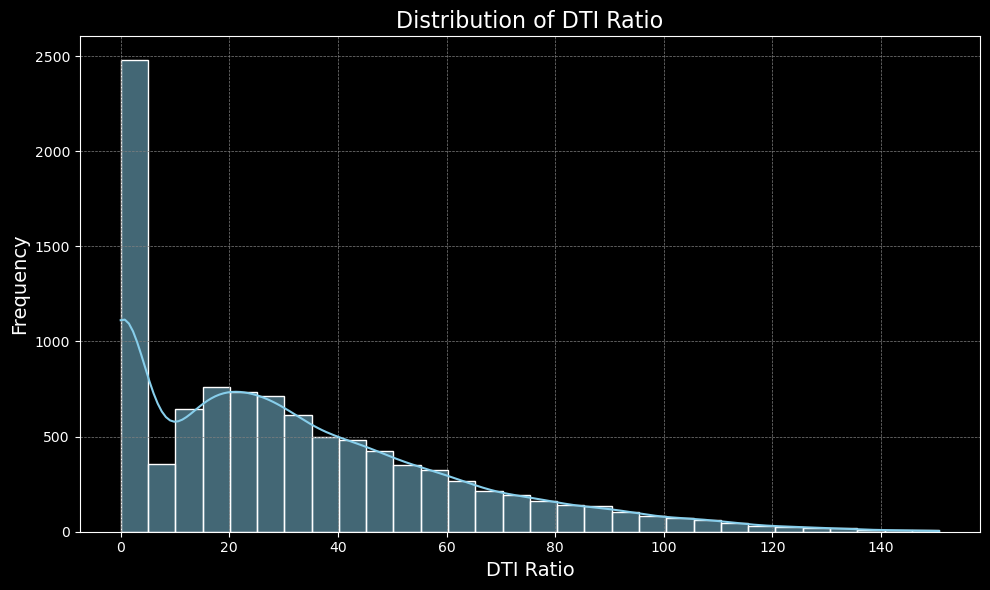

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set black background style
plt.style.use('dark_background')

# Drop missing values just in case
data = df['DTI_ratio'].dropna()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30, color='skyblue', edgecolor='white')  # white edges for visibility

plt.title('Distribution of DTI Ratio', fontsize=16, color='white')
plt.xlabel('DTI Ratio', fontsize=14, color='white')
plt.ylabel('Frequency', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

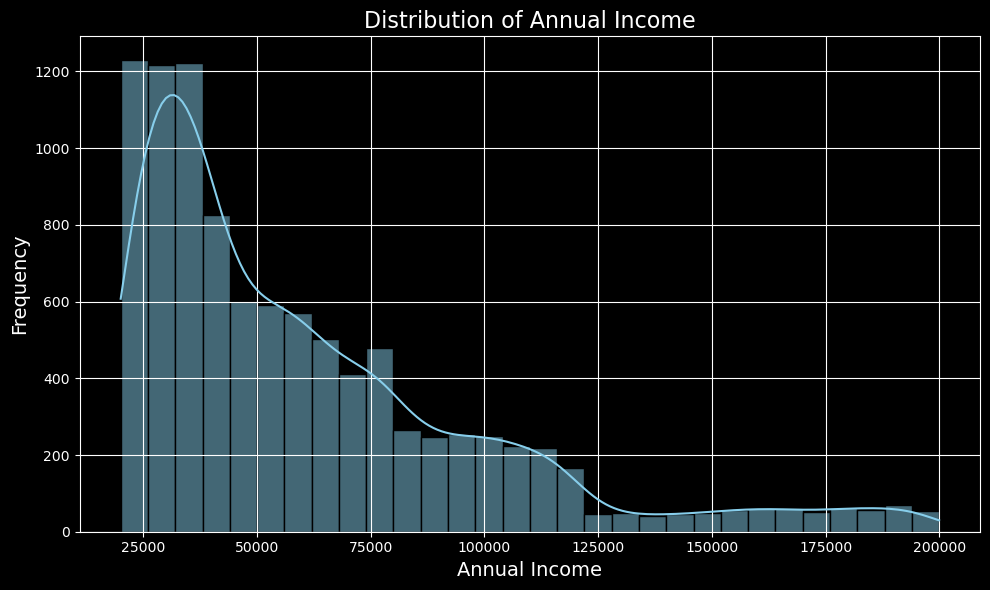

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set black background style
plt.style.use('dark_background')

# Drop missing values just in case
data = df['annual_income'].dropna()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
# Since it is not normaly distributed, Log() will be used to analyzed.

In [89]:
# Frequency Distribution of All Categorical Columns

In [90]:
# Select categorical columns
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# # Loop through and show frequency distribution
# for col in categorical_cols:
#     print(f"\n📊 Frequency distribution for: {col}")
#     print(df[col].value_counts(dropna=False))  # include NaNs


In [91]:
# hold categorical columns in a python for export or report
# Dictionary to hold frequency tables
freq_tables = {}

for col in categorical_cols:
    freq = df[col].value_counts(dropna=False).reset_index()
    freq.columns = [col, 'Count']
    freq_tables[col] = freq
# freq_tables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use('dark_background')

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Custom PDF name
pdf_path = r'C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\reports\figures\My_Categorical_Report_Aug2025.pdf'

with PdfPages(pdf_path) as pdf:
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=df,
            x=col,
            hue=col,
            order=df[col].value_counts().index,
            palette='pastel',
            edgecolor='white',
            legend=False,
            dodge=False
        )
        
        plt.title(f'Frequency of {col}', fontsize=16, color='white')
        plt.xlabel(col, fontsize=14, color='white')
        plt.ylabel('Count', fontsize=14, color='white')
        plt.xticks(rotation=45, ha='right', color='white')
        plt.yticks(color='white')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        
        pdf.savefig()
        plt.close()

print(f"✅ PDF report saved as: {pdf_path}")


In [ ]:
df.to_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\processed\credit_risk_after_data_cleansing.csv", index=False)
df.to_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\official\credit_risk_after_data_cleansing.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set black background style
plt.style.use('dark_background')

# Define the desired Moody's rating order
rating_order = ['Aaa','Aa','A', 'Baa','Ba','B', 'Caa','Ca','C']

# Convert to ordered categorical
df['Moodys_Rating'] = pd.Categorical(df['Moodys_Rating'], categories=rating_order, ordered=True)

# Drop missing values
data = df['Moodys_Rating'].dropna()

# Plot using countplot for categorical distribution
plt.style.use('dark_background')  # Optional for black background
plt.figure(figsize=(10, 6))
sns.countplot(x=data, order=rating_order, color='skyblue')

plt.title('Distribution of Moody\'s Rating', fontsize=16)
plt.xlabel('Moody\'s Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()




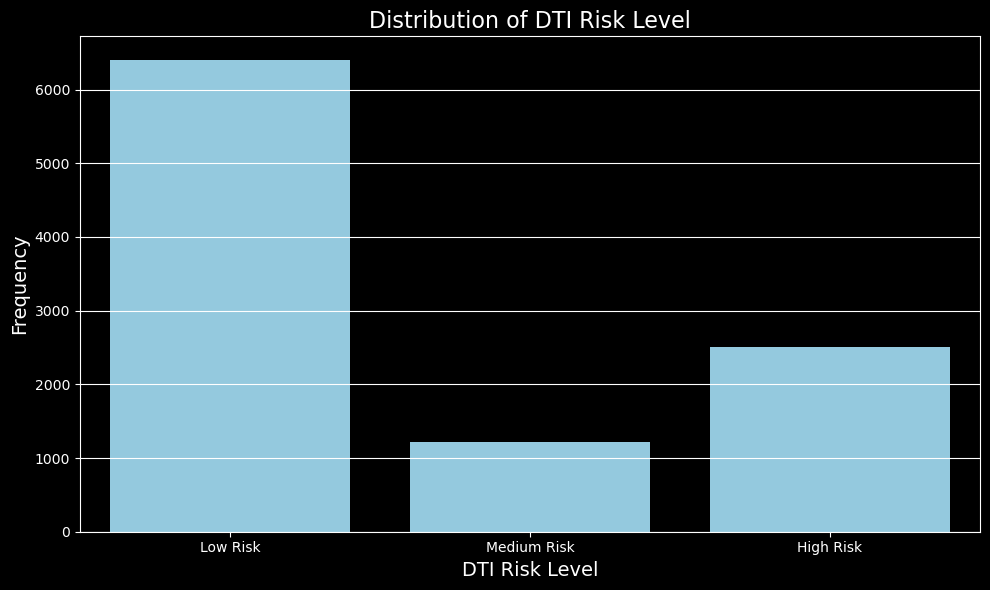

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set black background style
plt.style.use('dark_background')

# Define the desired Moody's rating order
rating_order = ['Low Risk','Medium Risk','High Risk']

# Convert to ordered categorical
df['DTI_Risk_Level'] = pd.Categorical(df['DTI_Risk_Level'], categories=rating_order, ordered=True)

# Drop missing values
data = df['DTI_Risk_Level'].dropna()

# Plot using countplot for categorical distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data, order=rating_order, color='skyblue')

plt.title('Distribution of DTI Risk Level', fontsize=16)
plt.xlabel('DTI Risk Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


